# Book Store (Pandas)

In [65]:
import pandas as pd

In [66]:
books = pd.read_csv('files/book_store/books.csv')
customers = pd.read_csv('files/book_store/customers.csv')
orders = pd.read_csv('files/book_store/orders.csv')


In [93]:
full_orders = pd.merge(
    pd.merge(customers, orders, left_on='customer_id', right_on='customer_id'),
    books, left_on='isbn', right_on='isbn'
)[['isbn', 'book_title', 'author_surname', 'customer_id', 'customer_surname', 'customer_country', 'book_price',
   'quantity']].set_index('isbn')

full_orders['total_price'] = full_orders['book_price'] * full_orders['quantity']

full_orders

,book_title,author_surname,customer_id,customer_surname,customer_country,book_price,quantity,total_price
isbn,,,,,,,,
1,Gone with the Wind,Mitchell,1,Smith,USA,100,2,200
1,Gone with the Wind,Mitchell,1,Smith,USA,100,4,400
1,Gone with the Wind,Mitchell,20,Jackson,Iceland',100,3,300
2,Jane Eyre,Bronte,1,Smith,USA,200,1,200
2,Jane Eyre,Bronte,18,Moore,South Korea,200,2,400
5,The Fellowship of the Ring,Tolkien,2,Johnson,Canada,500,1,500
5,The Fellowship of the Ring,Tolkien,11,Hernandez,Brazil,500,2,1000
10,Nineteen Eighty-Four,Orwell,2,Johnson,Canada,1000,2,2000
10,Nineteen Eighty-Four,Orwell,3,Williams,Australia,1000,3,3000


In [94]:
def get_customer_orders(customer_surname):
    df = full_orders[full_orders['customer_surname'] == customer_surname].groupby(
        ['isbn', 'book_title', 'author_surname', 'customer_surname', 'customer_country']).sum()

    return df

In [95]:
get_customer_orders('Smith')

,,,,,customer_id,book_price,quantity,total_price
isbn,book_title,author_surname,customer_surname,customer_country,,,,
1,Gone with the Wind,Mitchell,Smith,USA,2,200,6,600
2,Jane Eyre,Bronte,Smith,USA,1,200,1,200


In [98]:
def get_total_price_for_each_country():
    return full_orders.groupby(['customer_country']).sum()[['total_price']]

In [99]:
get_total_price_for_each_country()

,total_price
customer_country,
Argentina,5000
Australia,4800
Brazil,2400
Canada,2500
China,6900
England,9600
France,6600
Germany,5600
Iceland',1200


<Axes: title={'center': 'Total Price for Each Country'}>

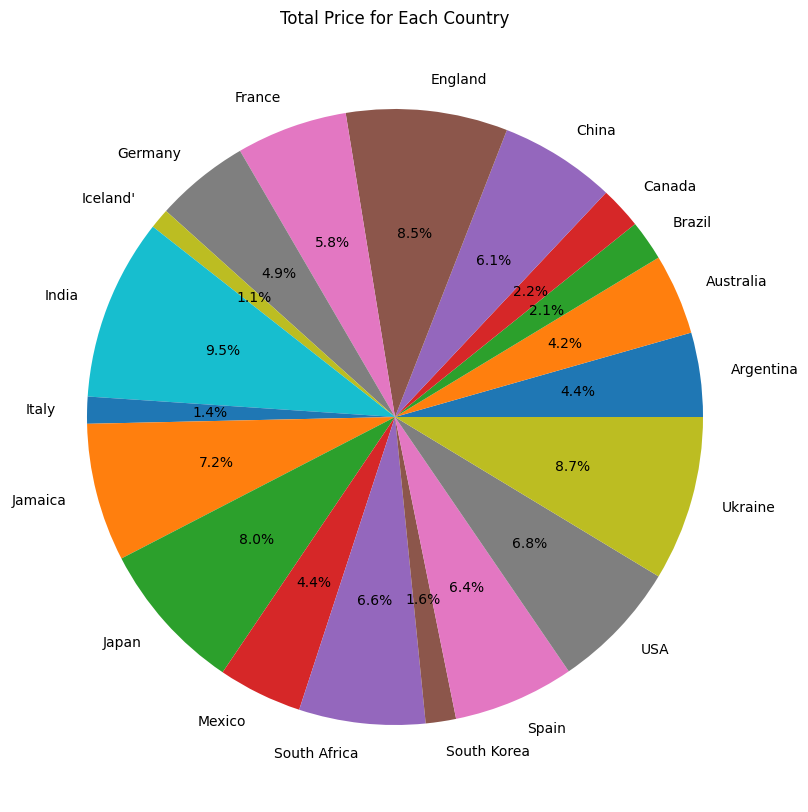

In [108]:
get_total_price_for_each_country().plot(kind='pie', y='total_price', figsize=(10, 10), legend=False, xlabel='',
                                        ylabel='', autopct='%1.1f%%', title='Total Price for Each Country')

In [111]:
def author_stats():
    return full_orders.groupby(['author_surname']).sum()[['total_price']]

In [110]:
author_stats()

,total_price
author_surname,
Austen,6000
Bronte,600
Brown,6300
Byrne,8400
Coelho,15500
Collins,4800
Darwin,4200
Green,9000
Hosseini,7500
